<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-02-10 08:34:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  58.3MB/s    in 2.6s    

2026-02-10 08:34:27 (58.3 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [5]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 168.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 165.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 124.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [6]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [7]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [10]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [11]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [12]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [14]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


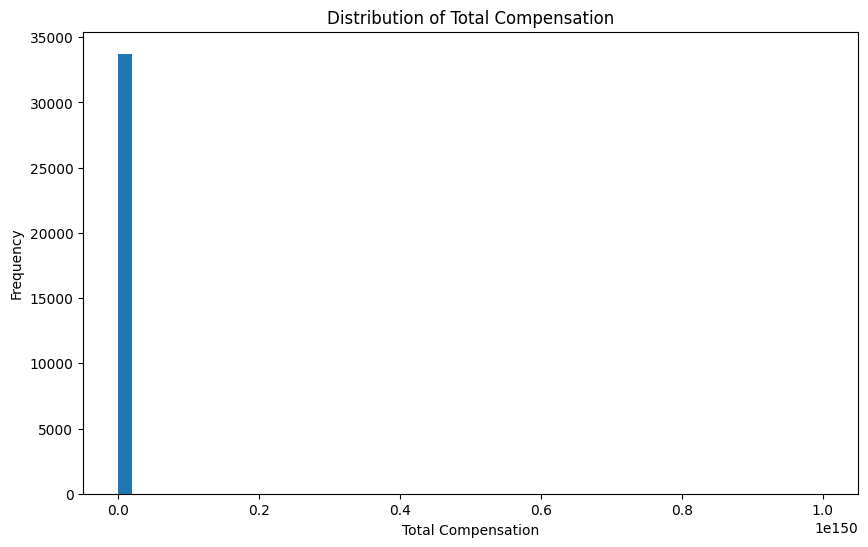

In [15]:
df=pd.read_csv('survey-data.csv')
#print(df.columns.tolist())
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'].dropna(), bins=50)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()


***Note***
>The distribution is extremely right‑skewed, with most values clustered at the low end and a long tail of very high compensation values. This pattern is typical for salary data and often indicates the presence of outliers or a wide range of respondent backgrounds.

**Box Plots**

Plot a box plot of Age.


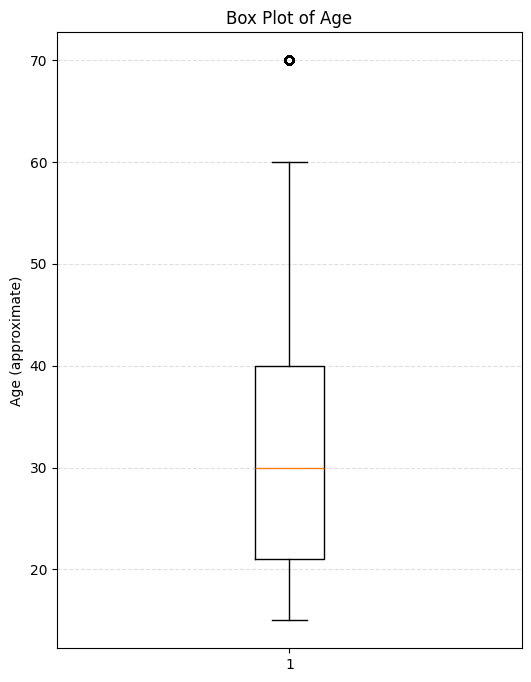

In [16]:
# # Uncomment the following to check Value couts for proper coding
# # Show the distribution of Age values
# print("\nValue counts for 'Age'(transformed):\n") 
# print(df_no_outliers['Age'].value_counts())

age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

plt.figure(figsize=(6, 8))
plt.boxplot(df['AgeNumeric'].dropna())
plt.ylabel('Age (approximate)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.title('Box Plot of Age')
plt.show()


### Interpretation
>Mapping each age group to its midpoint creates a smooth numeric distribution, and the resulting box plot shows a concentrated middle range with a few older outliers. This provides a reasonable approximation of respondent ages while preserving the structure of the original categorical groups.

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


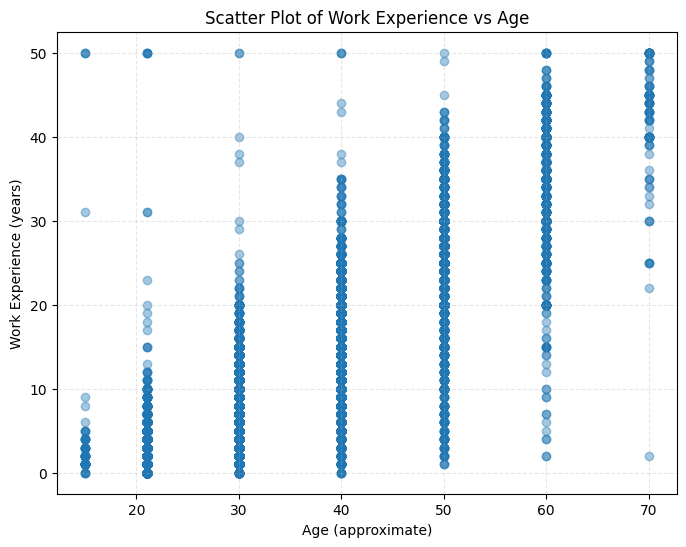

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['AgeNumeric'], df['WorkExp'], alpha=0.4)
plt.xlabel('Age (approximate)')
plt.ylabel('Work Experience (years)')
plt.title('Scatter Plot of Work Experience vs Age')  # <--- function notation $y = f(x)$, read as "Y is a function of X."
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Interpretation
- The vertical bands come from the age‑group midpoints you mapped (15, 21, 30, 40, 50, 60, 70). Within each band, work‑experience values spread upward as age rises. The overall shape forms an upward trend, reflecting a positive relationship: older respondents generally report more years of work experience. The spread within each age group shows that people enter the workforce at different times and progress at different rates, so age alone doesn’t fully determine experience.
>The plot shows a clear upward pattern: work experience generally increases with age, with natural variation inside each age group.

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


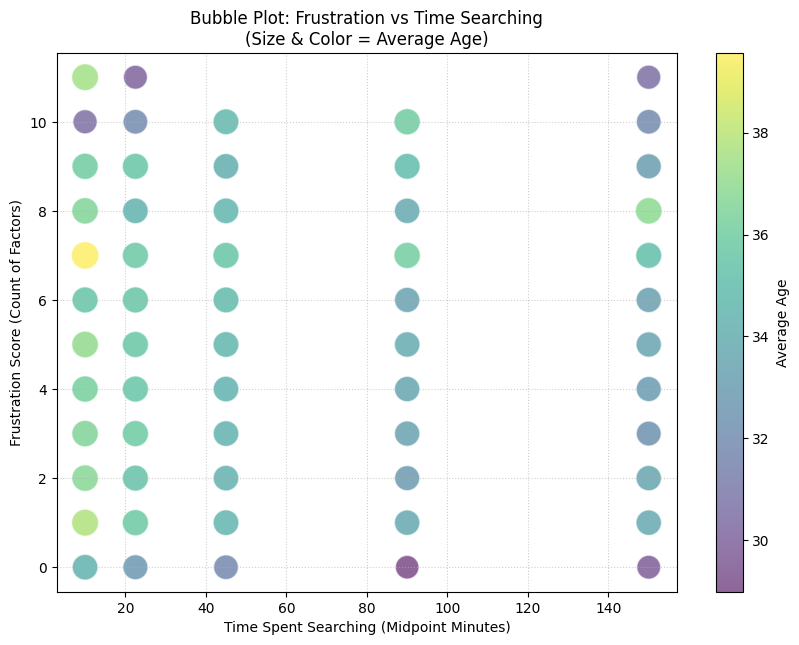

In [18]:
# # Uncomment the following two lines to see the value counts

# print(df['TimeSearching'].value_counts())
# print(df['Frustration'].value_counts())

# Step 1: Convert TimeSearching to numeric (midpoints)
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)

# Step 2: Convert Frustration to numeric
df['FrustrationNum'] = df['Frustration'].apply(
    lambda x: len(str(x).split(';')) if pd.notna(x) else 0
)

# Step 3: Bubble plot using AgeNumeric as bubble size
# A. Group the data to find the average Age for each pair of Time and Frustration
bubble_data = df.groupby(['TimeSearchingNum', 'FrustrationNum']).agg({
    'AgeNumeric': 'mean',
    'ResponseId': 'count' # Use count to show how many people are in this bubble
}).reset_index()

# B. Plot the aggregated data
plt.figure(figsize=(10, 7))

# We use the count (ResponseId) or the Age for size. 
# The task specifically asks for Age as the bubble size.
plt.scatter(
    x=bubble_data['TimeSearchingNum'],
    y=bubble_data['FrustrationNum'],
    s=bubble_data['AgeNumeric'] * 10,  # Multiplier to make bubbles visible
    c=bubble_data['AgeNumeric'],       # Color by Age
    cmap='viridis',
    alpha=0.6,
    edgecolors="w"
)

plt.xlabel('Time Spent Searching (Midpoint Minutes)')
plt.ylabel('Frustration Score (Count of Factors)')
plt.title('Bubble Plot: Frustration vs Time Searching\n(Size & Color = Average Age)')
plt.colorbar(label='Average Age')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()


Convert both categorical variables into numeric form, aggregates the data, and produces a bubble plot where:

- **X‑axis** = TimeSearching (numeric midpoint)  
- **Y‑axis** = Frustration (numeric count)  
- **Bubble size & color** = Average Age  

This satisfies the requirement of using Age as the bubble size while still producing a readable visualization by grouping the data first.

> The bubble plot shows how frustration levels vary with time spent searching, with bubble size and color indicating the average age of respondents. Larger, darker bubbles represent older participants, allowing age patterns to be compared across different search‑time and frustration combinations.

### Interpretation  
If **Age = X‑axis** and **Frustration = Y‑axis**, then **TimeSearching must be the bubble size** because the task describes a three‑variable bubble plot:

- X → Age  
- Y → Frustration  
- Bubble size → TimeSearching  

>To make this work, both Frustration and TimeSearching must be numeric. See the next code by uncommenting

In [48]:
# # Convert TimeSearching to numeric midpoints
# time_map = {
#     'Less than 15 minutes a day': 10,
#     '15-30 minutes a day': 22.5,
#     '30-60 minutes a day': 45,
#     '60-120 minutes a day': 90,
#     'Over 120 minutes a day': 150
# }

# df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)

# # Convert Frustration to numeric by counting factors
# df['FrustrationNum'] = df['Frustration'].apply(
#     lambda x: len(str(x).split(';')) if x is not None else 0
# )

# # Bubble plot
# plt.figure(figsize=(9,6))
# plt.scatter(
#     df['AgeNumeric'],
#     df['FrustrationNum'],
#     s=df['TimeSearchingNum']*2,
#     alpha=0.4,
#     c=df['TimeSearchingNum'],
#     cmap='viridis'
# )

# plt.xlabel('Age (approximate)')
# plt.ylabel('Frustration Score (Count of Factors)')
# plt.title('Bubble Plot of Frustration vs Age (Bubble Size = Time Searching)')
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.colorbar(label='Time Searching (minutes)')
# plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


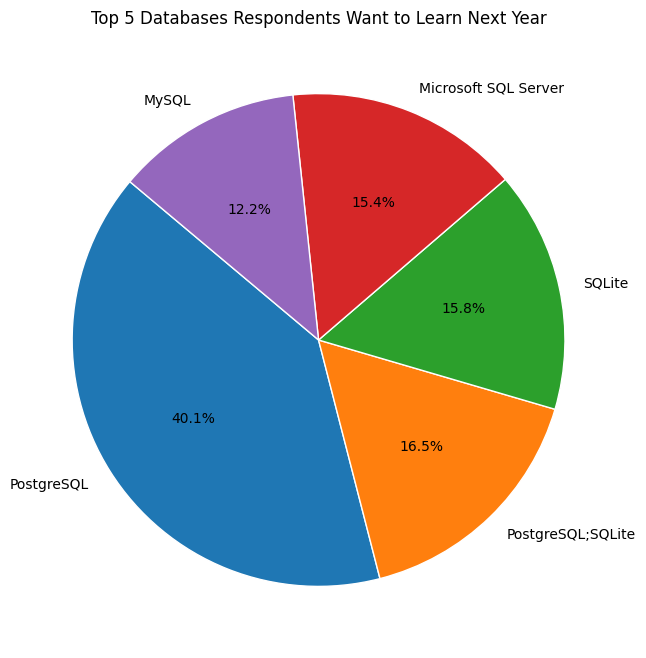

In [20]:
# Value counts for the database column
db_counts = df['DatabaseWantToWorkWith'].value_counts().head(5)

plt.figure(figsize=(8,8))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


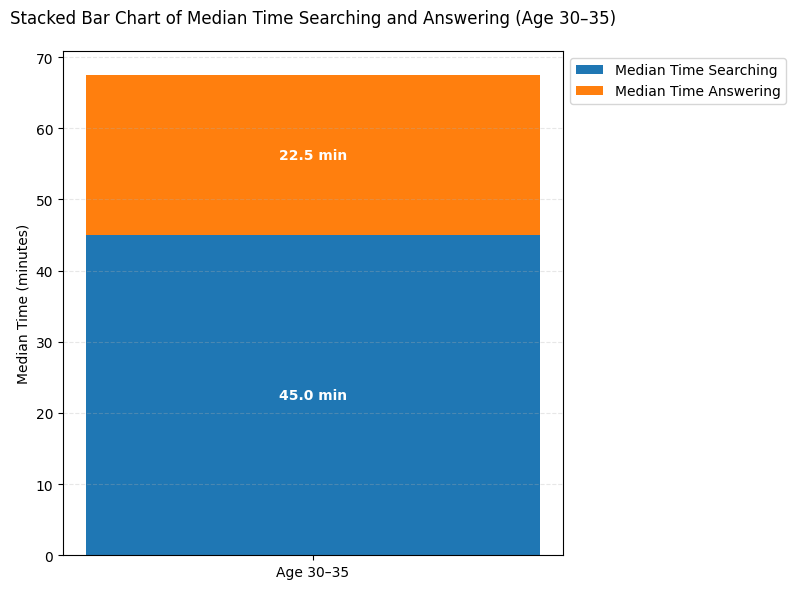

In [31]:
# #Uncomment to see value counts
#df['TimeAnswering'].value_counts()

# Step 1: Convert TimeAnswering to numeric (midpoints)
answering_time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeAnsweringNum'] = df['TimeAnswering'].map(answering_time_map)

# Filter the age group 30–35
age_group = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Compute medians
median_search = age_group['TimeSearchingNum'].median()
median_answer = age_group['TimeAnsweringNum'].median()

# Prepare data
labels = ['Age 30–35']
search_values = [median_search]
answer_values = [median_answer]

plt.figure(figsize=(8,6))

# Bars
plt.bar(labels, search_values, label='Median Time Searching')
plt.bar(labels, answer_values, bottom=search_values, label='Median Time Answering')

# Annotate medians
plt.text(0, median_search/2, f"{median_search:.1f} min", ha='center', va='center', color='white', fontweight='bold')
plt.text(0, median_search + median_answer/2, f"{median_answer:.1f} min", ha='center', va='center', color='white', fontweight='bold')

# Labels and title
plt.ylabel('Median Time (minutes)')
plt.title('Stacked Bar Chart of Median Time Searching and Answering (Age 30–35)', pad=20)

# Legend moved to lower right
plt.legend(bbox_to_anchor=(1, 1))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


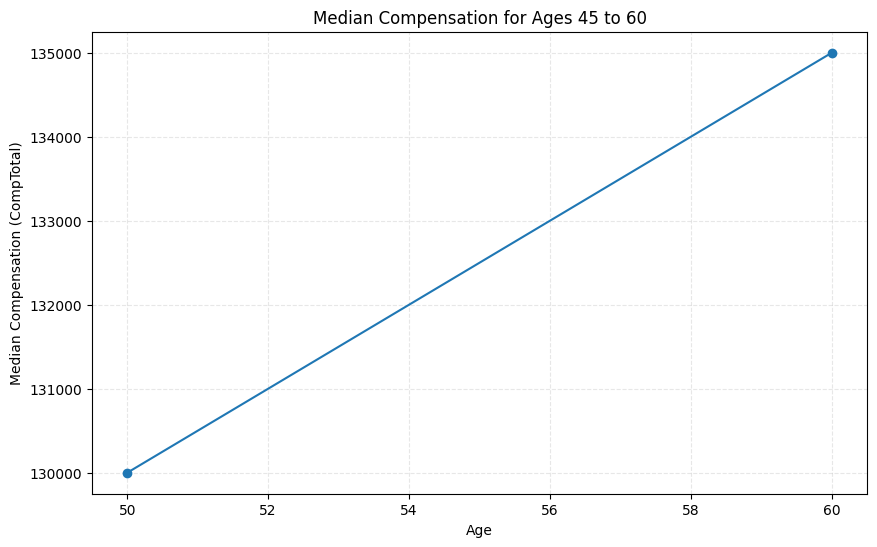

In [33]:
# Filter ages 45 to 60
age_range = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Compute median CompTotal for each age
median_comp = age_range.groupby('AgeNumeric')['CompTotal'].median()

plt.figure(figsize=(10,6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Median Compensation (CompTotal)')
plt.title('Median Compensation for Ages 45 to 60')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


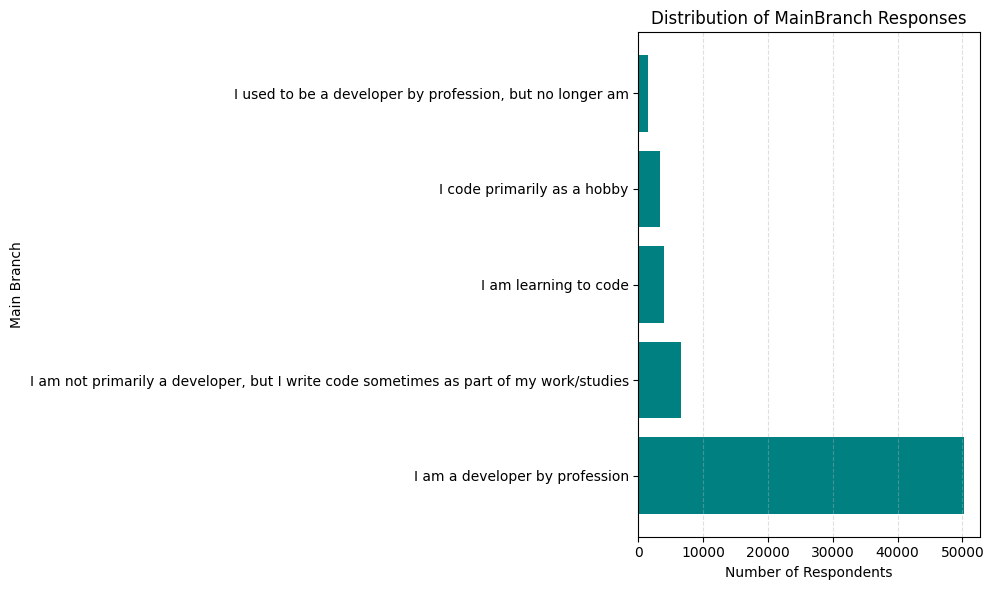

In [43]:
# Value counts for MainBranch
mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='teal')

plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of MainBranch Responses')

# # Narrower tick spacing
# plt.xticks(ticks=range(0, mainbranch_counts.max()+5000, 5000))

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [44]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
